In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import/load dataset

df=pd.read_csv('cardio_train.csv')

In [3]:
#dispaly only 5 row from the dataset
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
#find the number of rows & columns in the dataset

df.shape

(69301, 13)

In [5]:
# Check the datatypes of the values in the dataset

df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [6]:
# display columns name from dataset
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
#find out the mean, minmum,maximum, standard deviation, first quartile, second quartile, third quartile & count in the dta set

df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# to find out the columns name in from the dataset
df.cardio.value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

In [10]:
# To check null values in the dataset

df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
#Find the correlation in the data set

dfcor=df.corr()

In [12]:
# Dispaly/print the corelationbetween columns in data set

dfcor

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


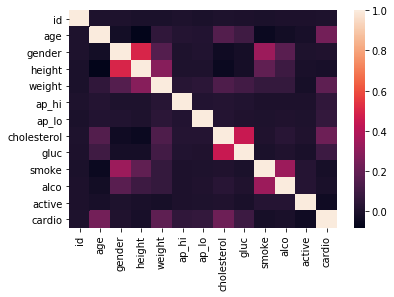

In [13]:
#To check correlation by using heatmap
sns.heatmap(dfcor)

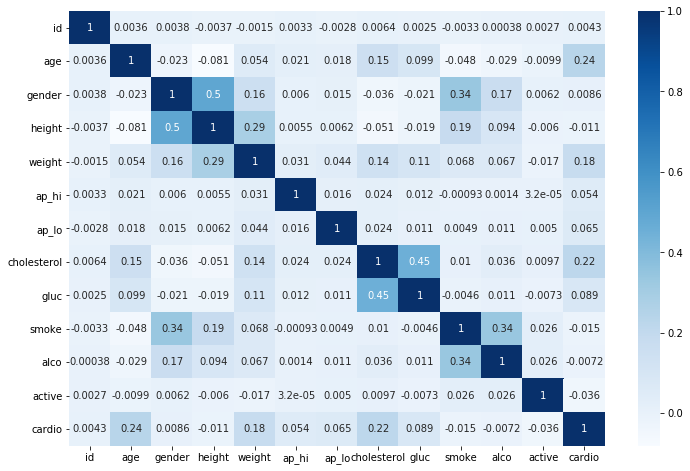

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='Blues',annot=True)

###### To check the outliers in the data set

In [15]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

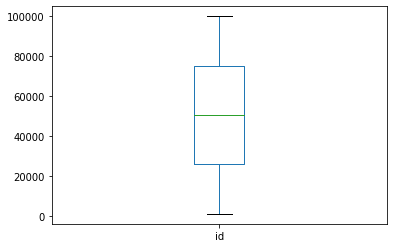

In [16]:
df['id'].plot.box()

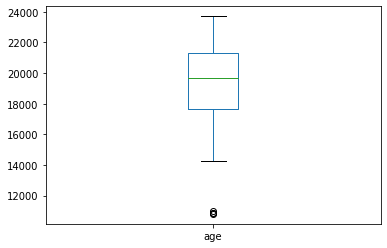

In [17]:
df['age'].plot.box()

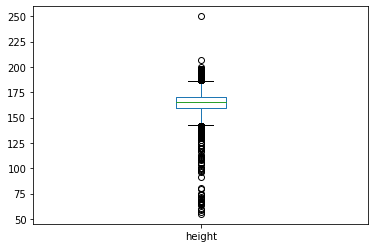

In [18]:
df['height'].plot.box()

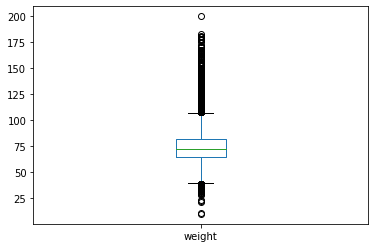

In [19]:
df['weight'].plot.box()

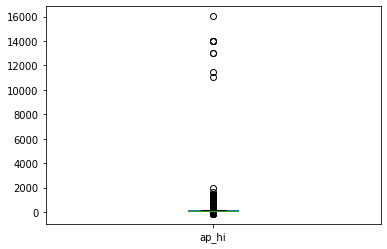

In [20]:
df['ap_hi'].plot.box()

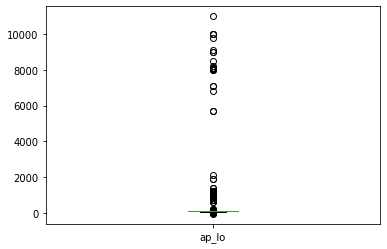

In [21]:
df['ap_lo'].plot.box()

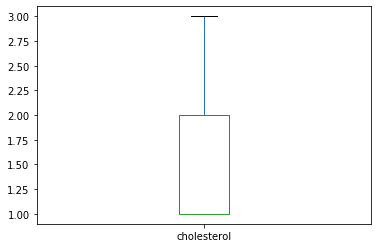

In [22]:
df['cholesterol'].plot.box()

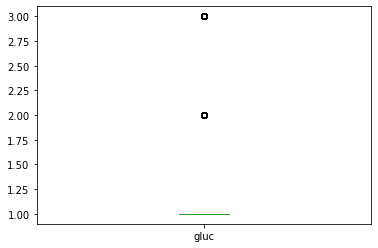

In [23]:
df['gluc'].plot.box()

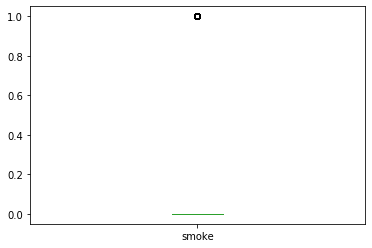

In [24]:
df['smoke'].plot.box()

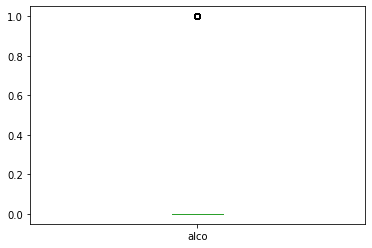

In [25]:
df['alco'].plot.box()

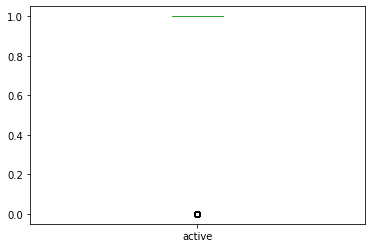

In [26]:
df['active'].plot.box()

###### To check distribution of skewness

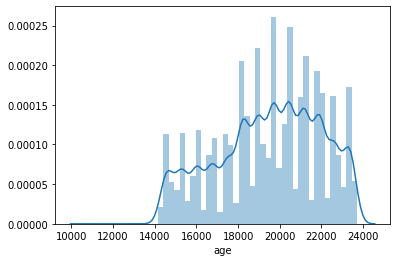

In [27]:
sns.distplot(df['age'])

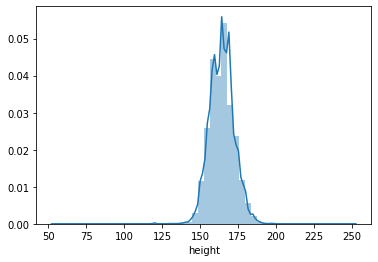

In [28]:
sns.distplot(df['height'])

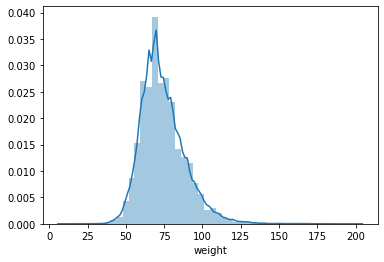

In [29]:
sns.distplot(df['weight'])

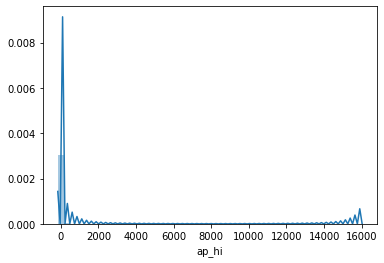

In [30]:
sns.distplot(df['ap_hi'])

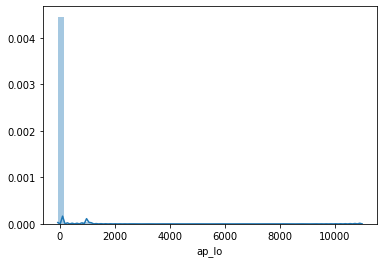

In [31]:
sns.distplot(df['ap_lo'])

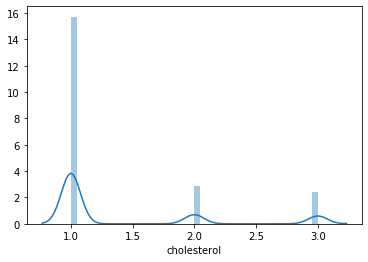

In [32]:
sns.distplot(df['cholesterol'])

In [33]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[1.73243929, 1.21601824, 0.73302344, ..., 0.23864069, 0.49376463,
        0.99917784],
       [1.73240428, 1.95391548, 0.73302344, ..., 0.23864069, 0.49376463,
        1.00082284],
       [1.73236927, 0.98580185, 0.73302344, ..., 0.23864069, 0.49376463,
        0.99917784],
       ...,
       [1.7338761 , 0.16325352, 1.36421285, ..., 4.19040018, 2.02525646,
        1.00082284],
       [1.73394612, 1.20061644, 0.73302344, ..., 0.23864069, 2.02525646,
        1.00082284],
       [1.73398113, 0.43417421, 0.73302344, ..., 0.23864069, 0.49376463,
        0.99917784]])

In [34]:
threshold=3
print(np.where(z>3))

(array([    3,     3,    13, ..., 69296, 69297, 69298], dtype=int64), array([ 9, 10,  8, ...,  9,  4, 10], dtype=int64))


In [35]:
z[3][9]

3.2182442471147503

In [36]:
z[3][10]

4.190400180052936

In [37]:
df_new=df[(z<3).all(axis=1)]

In [38]:
df_new

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69293,99990,18792,1,161,56.0,170,90,1,1,0,0,1,1
69294,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69295,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [39]:
df.shape

(69301, 13)

In [40]:
df_new.shape

(55140, 13)

In [41]:
# to check skewness of the data set
df.skew()

id             -0.001317
age            -0.307388
gender          0.631203
height         -0.634040
weight          1.005120
ap_hi          84.886144
ap_lo          32.101546
cholesterol     1.587480
gluc            2.397520
smoke           2.907579
alco            3.951845
active         -1.531525
cardio          0.001645
dtype: float64

In [42]:
# to check skewness of the data set after remove outliers
df_new.skew()

id            -0.002602
age           -0.289501
gender         0.902729
height         0.098899
weight         0.574304
ap_hi         -0.252020
ap_lo          4.735143
cholesterol    2.018967
gluc           3.202861
smoke          0.000000
alco           0.000000
active        -1.498342
cardio         0.061184
dtype: float64

In [43]:
#End EDA process

###### Start Modeling 

In [44]:
#assign the feture values in variable x
x=df_new.drop(['cardio'], axis = 1) 

In [45]:
# Scaling the data before create model

from sklearn.preprocessing import scale
X = scale(x)

In [46]:
X

array([[-1.73485461,  1.22681158, -0.64578912, ...,  0.        ,
         0.        ,  0.50034002],
       [-1.73481956, -1.93853213, -0.64578912, ...,  0.        ,
         0.        ,  0.50034002],
       [-1.73478451,  0.99692854, -0.64578912, ...,  0.        ,
         0.        ,  0.50034002],
       ...,
       [ 1.73521433,  0.66222208, -0.64578912, ...,  0.        ,
         0.        ,  0.50034002],
       [ 1.73542463,  1.21143208, -0.64578912, ...,  0.        ,
         0.        , -1.99864084],
       [ 1.73545968,  0.44609965, -0.64578912, ...,  0.        ,
         0.        ,  0.50034002]])

In [47]:
X.shape

(55140, 12)

In [48]:
cardio_target=pd.DataFrame(df_new.cardio)
Y=cardio_target

In [49]:
# Target variable transform to np.array
Y=np.array(Y)

In [50]:
Y.shape

(55140, 1)

In [51]:
# Split the data into test and training sets

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=50)

In [52]:
# Find the shape of trained data 

X_train.shape

(41355, 12)

In [53]:
# Find the shape of test data 
X_test.shape

(13785, 12)

In [54]:
# Find the shape of tested target data 
Y_test.shape

(13785, 1)

In [55]:
#initial logistic regression model

lg=LogisticRegression()

In [56]:
# fit the model

lg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
pred=lg.predict(X_test)

In [58]:
print(pred)

[0 0 0 ... 1 0 0]


In [59]:
# print Accuracy score

print("Accuracy score:-", accuracy_score(pred,Y_test))

Accuracy score:- 0.7286906057308669


In [60]:
# To check & print confision matrix
print(confusion_matrix(Y_test,pred))

[[5625 1482]
 [2258 4420]]


In [61]:
# Final display classification model report

print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      7107
           1       0.75      0.66      0.70      6678

    accuracy                           0.73     13785
   macro avg       0.73      0.73      0.73     13785
weighted avg       0.73      0.73      0.73     13785



In [62]:
# To apply Decision Tree Model

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=50)

In [64]:
clf = DecisionTreeClassifier()

In [65]:
clf = clf.fit(X_train,Y_train)

In [66]:
Y_pred = clf.predict(X_test)

In [67]:
print(Y_pred)

[0 0 0 ... 0 0 1]


In [68]:
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 0.637867247007617


In [69]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 0.7336235038084875


In [70]:
print(confusion_matrix(Y_test,pred))

[[5625 1482]
 [2258 4420]]


In [71]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      7107
           1       0.75      0.66      0.70      6678

    accuracy                           0.73     13785
   macro avg       0.73      0.73      0.73     13785
weighted avg       0.73      0.73      0.73     13785

